In [1]:
import numpy as np
import matplotlib.pyplot as plt

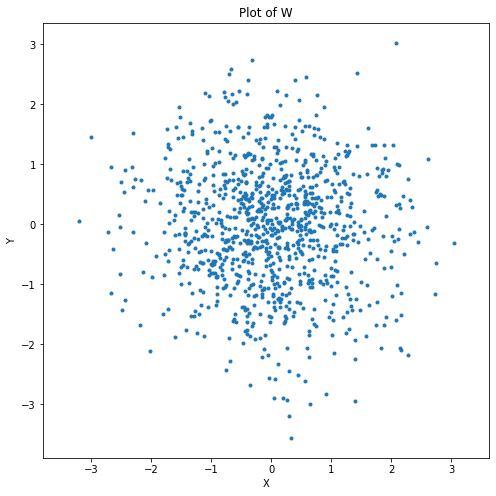

In [2]:
n = 1000
p = 2
W = np.random.normal(loc=0, scale=1, size=(p, n))
plt.figure(1, figsize=(8,8))
plt.plot(W[0], W[1], '.')
plt.title('Plot of W')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

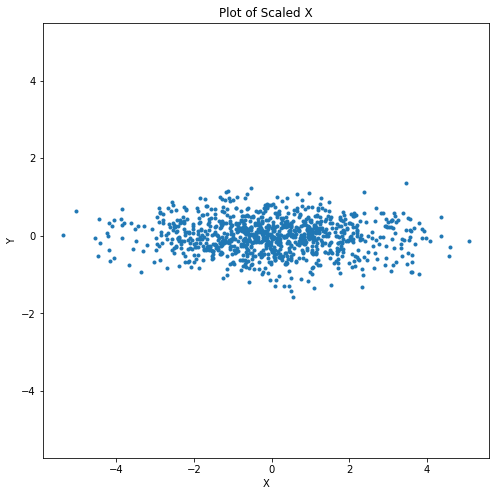

In [3]:
R_x = np.asarray([[2, -1.2],[-1.2, 1]])
eigen_val, eigen_vec = np.linalg.eig(R_x)
X_scaled = np.zeros_like(W)
for i in range(n):
    X_scaled[:, i] = np.multiply(np.sqrt(eigen_val), W[:,i])
plt.figure(2, figsize=(8,8))
plt.plot(X_scaled[0], X_scaled[1], '.')
plt.title('Plot of Scaled X')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

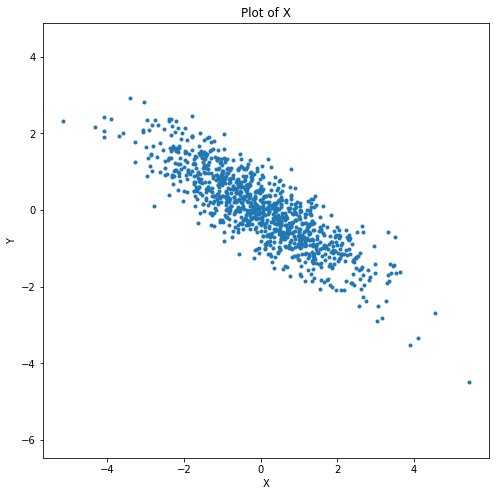

In [37]:
X = np.zeros_like(W)
for i in range(n):
    X[:, i] = np.dot(eigen_vec, X_scaled[:, i])
plt.figure(3, figsize=(8,8))
plt.plot(X[0], X[1], '.')
plt.title('Plot of X')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

In [22]:
est_mean = np.mean(X, axis=1)
Z = X - est_mean.reshape(2,1)
est_R = 1/(n-1) * (np.dot(Z, Z.transpose()))
print(est_R)

[[ 2.06503876 -1.20211637]
 [-1.20211637  0.98290674]]


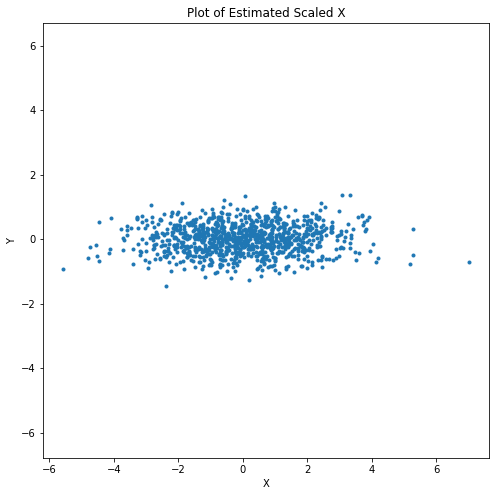

In [27]:
est_X_scaled = np.zeros_like(W)
for i in range(n):
    est_X_scaled[:, i] = np.dot(eigen_vec.transpose(), X[:, i])
plt.figure(4, figsize=(8,8))
plt.plot(est_X_scaled[0], est_X_scaled[1], '.')
plt.title('Plot of Estimated Scaled X')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

[0.5976143  2.23606798]


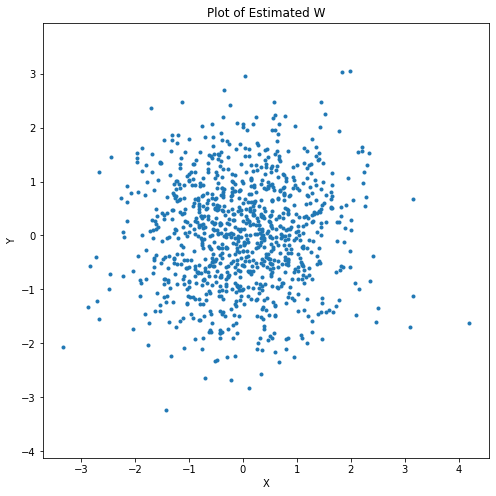

In [34]:
est_W = np.zeros_like(W)
print(1/np.sqrt(eigen_val))
for i in range(n):
    # est_W[:, i] = np.dot(np.dot((1/np.sqrt(eigen_val)), eigen_vec.transpose()), X[:,i])
    est_W[:, i] = np.multiply((1/np.sqrt(eigen_val)), est_X_scaled[:,i])
plt.figure(5, figsize=(8,8))
plt.plot(est_W[0], est_W[1], '.')
plt.title('Plot of Estimated W')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

In [35]:
est_mean = np.mean(W, axis=1)
Z = W - est_mean.reshape(2,1)
est_Rw = 1/(n-1) * (np.dot(Z, Z.transpose()))
print(est_Rw)

[[1.01490034 0.04956774]
 [0.04956774 1.0311228 ]]
